# Bonus part 1 - Create embedding with Keras
note - this is a colab notebook!

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import io
%matplotlib inline
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
drive.mount('/content/gdrive')

Using TensorFlow backend.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('gdrive/My Drive/complex_networks/25k_users_sample.csv')
df.head()

,user,rating,date,movie
0,2625420,2.0,2004-05-25,13368
1,1650301,1.0,2005-08-30,13368
2,2500511,4.0,2003-08-11,13368
3,2473764,4.0,2005-09-26,13368
4,310049,2.0,2004-03-15,13368


# Creating and running the model

In [ ]:
df['user_n'] = pd.factorize(df.user)[0]
df['movie_n'] = pd.factorize(df.movie)[0]
train, test = train_test_split(df, test_size=0.2, random_state=42)
n_users = len(df.user_n.unique())
n_movies = len(df.movie_n.unique())

movie_input = Input(shape=[1], name="movie-Input")
movie_embedding = Embedding(n_movies, 32, name="movie-Embedding", activity_regularizer= l2(0.01))(movie_input)
movie_vec = Flatten(name="Flatten-movies")(movie_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users, 32, name="User-Embedding", activity_regularizer= l2(0.01))(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([movie_vec, user_vec])
model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

history = model.fit([train.user_n, train.movie_n], train.rating, epochs=4, verbose=1, validation_data=([test.user_n, test.movie_n], test.rating))
model.save('regression_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 3053580 samples, validate on 763395 samples
Epoch 1/4
3053580/3053580 [==============================] - 344s 113us/step - loss: 3.9385 - val_loss: 3.1527
Epoch 2/4
3053580/3053580 [==============================] - 348s 114us/step - loss: 3.1473 - val_loss: 3.1505
Epoch 3/4
3053580/3053580 [==============================] - 345s 113us/step - loss: 3.1452 - val_loss: 3.1481
Epoch 4/4
3053580/3053580 [==============================] - 343s 112us/step - loss: 3.1447 - val_loss: 3.1436


### Plotting with tsne the embeddings
just to check it is working before bonus part 2

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4402 samples in 0.005s...
[t-SNE] Computed neighbors for 4402 samples in 0.312s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4402
[t-SNE] Computed conditional probabilities for sample 2000 / 4402
[t-SNE] Computed conditional probabilities for sample 3000 / 4402
[t-SNE] Computed conditional probabilities for sample 4000 / 4402
[t-SNE] Computed conditional probabilities for sample 4402 / 4402
[t-SNE] Mean sigma: 0.010808
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.513256
[t-SNE] KL divergence after 300 iterations: 1.235059


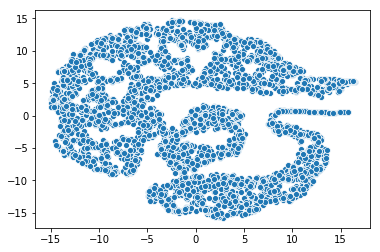

In [ ]:
import seaborn as sns
movie_em = model.get_layer('movie-Embedding')
movie_em_weights = movie_em.get_weights()[0]
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(movie_em_weights)
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

# Save to csv

In [ ]:
movie_dict = df[['movie','movie_n']].set_index('movie_n').drop_duplicates().to_dict()['movie']
movies_embedding = pd.DataFrame(movie_em_weights).reset_index()
movies_embedding['index'] = movies_embedding['index'].map(movie_dict)

In [ ]:
from google.colab import files
# movies_embedding.to_csv('movies_embedding.csv')
files.download('movies_embedding.csv')